# import part

In [1]:
import torch
import matplotlib.pyplot as plt
from model_with_given_label import Diffuser
from math import sqrt, ceil

# Model train part

Simply run <b> python train_with_given_label.py </b> in command will start the training process.

# Model eval part

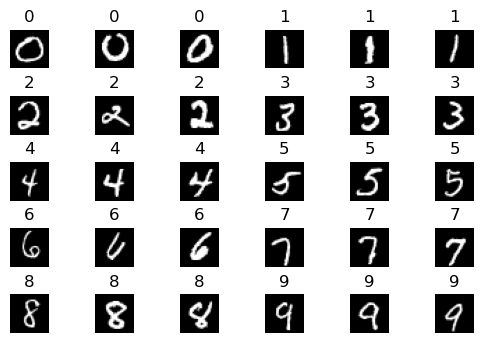

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Diffuser(
        timesteps=1000,
        image_size=28,
        in_channels=1,
        base_dim=64,
        dim_mults=[2,4]
    ).to(device)
checkpoint = torch.load('model_with_given_label.pt', map_location=device)
model.load_state_dict(checkpoint["model"])
model.eval()

# input labels
labels = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9]
# labels = [0,1,2,3,4,5,6,7,8,9]

labels = torch.Tensor(labels).long().to(device)

images, labels = model.sampling(len(labels), device, labels)

for i in range(len(images)):
    plt.subplot(ceil(sqrt(len(images))), ceil(sqrt(len(images))), i+1)
    plt.imshow(images[i].squeeze().cpu().numpy(), cmap='gray')
    plt.title(labels[i].item())
    plt.axis('off')
    plt.subplots_adjust(hspace=0.7)


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InceptionModule(nn.Module):
    def __init__(self, in_channels, D):
        super(InceptionModule, self).__init__()
        self.conv1x3 = nn.Conv2d(in_channels, D, kernel_size=(1, 3), stride=1, padding=(0, 0))
        self.conv2x3 = nn.Conv2d(in_channels, D, kernel_size=(2, 3), stride=1, padding=(0, 0))
        self.max_pool = nn.MaxPool2d(kernel_size=(2, 1), stride=1, padding=0)
        
    def forward(self, x):
        # 1x3 convolution
        x1 = self.conv1x3(x)

        print(x1.shape)
        
        # 2x3 convolution
        x2 = self.conv2x3(x)

        print(x2.shape)
        
        # 2x1 max pooling
        x3 = self.max_pool(x1)
        
        print(x3.shape)
        # Depthwise Concatenation
        x_concat = torch.cat((x2, x3), dim=1)
        
        print(x_concat.shape)
        # 2x1 average pooling
        x_pool = F.avg_pool2d(x_concat, kernel_size=(2, 1))
        
        print(x_pool.shape) 
        return x_pool

images = torch.randn(1, 1, 3, 3)
inception = InceptionModule(1, 1)
out = inception(images)

torch.Size([1, 1, 3, 1])
torch.Size([1, 1, 2, 1])
torch.Size([1, 1, 2, 1])
torch.Size([1, 2, 2, 1])
torch.Size([1, 2, 1, 1])
